In [18]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import postprocess as pp
# import plots
import os

In [19]:

def l2_norm(components):
    """
    Compute the L2 norm of a vector field defined by components on their respective domains.

    Parameters:
        components (list): List of tuples (x, f) where x is the mesh coordinates and f is the field values.

    Returns:
        float: L2 norm of the vector field.
    """
    norms = []

    for x, f in components:
        # Compute the square of the field values
        squared_values = f**2

        # Compute the integral using the trapezoidal rule
        integral = np.trapz(squared_values, x)

        # Take the square root to get the L2 norm
        component_norm = np.sqrt(integral)
        norms.append(component_norm)

    # Compute the vector norm by summing the squared norms and taking the square root
    vector_norm = np.sqrt(np.sum(np.array(norms)**2))

    return vector_norm

In [20]:
experiment = '../../test/output/rayleigh-benchmark/MPI-1/e9276db499c49b725dbe8cb8ac8c9521'
params, data, signature = pp.load_data(experiment)


File 'time_data.json' not found. Handle this case accordingly.
no sig file found


In [21]:
modes_data = np.load(os.path.join(experiment, 'mode_shapes_data.npz'), allow_pickle=True)


In [22]:
mode = pp.read_mode_data_from_npz(modes_data, time_step=0, num_modes=1, num_points=10)
_fig, _axes = pp.plot_fields_for_time_step(mode)

KeyError: 'mesh is not a file in the archive'

## Parametric Rayleigh benchmark

In [23]:
import os
cwd = os.getcwd()
path_components = cwd.split(os.path.sep)
path_components = path_components[0:-2]
dirroot =  '/' + os.path.join(*path_components, 'test', 'output', 'rayleigh-benchmark-parametric', 'MPI-1')

!ls $dirroot


66d30348817e47f8539938b25ede889f


In [24]:
for subdir, dirs, files in os.walk(dirroot):
    if not os.path.isfile(subdir + "/signature.md5"):
        continue
    print(subdir)
    modes_data = np.load(os.path.join(subdir, 'mode_shapes_data.npz'), allow_pickle=True)
    mode = pp.read_mode_data_from_npz(modes_data, time_step=0, num_modes=1, num_points=-1)
    params, data, signature = pp.load_data(subdir)

    # params, data, signature = pp.load_data(subdir)
    # cone_data = data["solver_KS_data"][[isinstance(d["iterations"], int) for d in data["solver_KS_data"]]]
    # _offset = sum([not isinstance(d["iterations"], int) for d in data["solver_KS_data"]])

    # _ell = params['model']['ell']
    # print(f" scaling = {params['stability']['cone']['scaling']}")
    # pd.DataFrame(cone_data)
    # for entry in cone_data:
        # plt.plot(entry["lambda_0"])


/Users/kumiori3/Documents/WIP/Nature/mec647/test/output/rayleigh-benchmark-parametric/MPI-1/66d30348817e47f8539938b25ede889f
File 'time_data.json' not found. Handle this case accordingly.


In [25]:
import numpy as np

# Example usage
mesh_coordinates = np.linspace(0, 1, 100)  # Adjust the number of points as needed
field_values = np.sin(np.pi * mesh_coordinates)  # Replace with your field values
field_values = np.sin(np.sin(np.pi * mesh_coordinates))  # Replace with your field values
# field_values = np.ones(len(mesh_coordinates))  # Replace with your field values
result = l2_norm([(mesh_coordinates, field_values)])
print(result)


0.6229402944338904


In [26]:
mode

{'mesh': array([0.001  , 0.01098, 0.02096, 0.03094, 0.04092, 0.0509 , 0.06088,
        0.07086, 0.08084, 0.09082, 0.1008 , 0.11078, 0.12076, 0.13074,
        0.14072, 0.1507 , 0.16068, 0.17066, 0.18064, 0.19062, 0.2006 ,
        0.21058, 0.22056, 0.23054, 0.24052, 0.2505 , 0.26048, 0.27046,
        0.28044, 0.29042, 0.3004 , 0.31038, 0.32036, 0.33034, 0.34032,
        0.3503 , 0.36028, 0.37026, 0.38024, 0.39022, 0.4002 , 0.41018,
        0.42016, 0.43014, 0.44012, 0.4501 , 0.46008, 0.47006, 0.48004,
        0.49002, 0.5    , 0.50998, 0.51996, 0.52994, 0.53992, 0.5499 ,
        0.55988, 0.56986, 0.57984, 0.58982, 0.5998 , 0.60978, 0.61976,
        0.62974, 0.63972, 0.6497 , 0.65968, 0.66966, 0.67964, 0.68962,
        0.6996 , 0.70958, 0.71956, 0.72954, 0.73952, 0.7495 , 0.75948,
        0.76946, 0.77944, 0.78942, 0.7994 , 0.80938, 0.81936, 0.82934,
        0.83932, 0.8493 , 0.85928, 0.86926, 0.87924, 0.88922, 0.8992 ,
        0.90918, 0.91916, 0.92914, 0.93912, 0.9491 , 0.95908, 0.96906

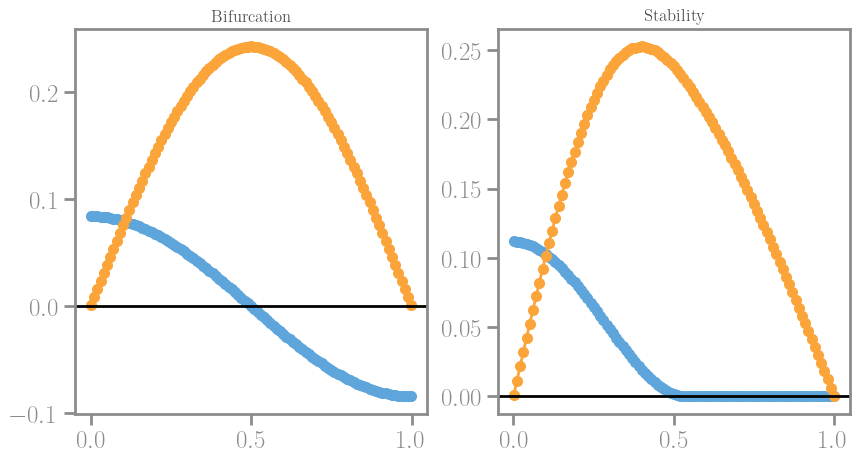

In [27]:
mode = pp.read_mode_data_from_npz(modes_data, time_step=0, num_modes=1, num_points=10)
_fig, _axes = pp.plot_fields_for_time_step(mode)

In [28]:
l2_norm([
    (mode['mesh'], mode['fields']['bifurcation_v']),
    (mode['mesh'], mode['fields']['bifurcation_β'])
    ])

0.18171983239793219

In [29]:
max(mode['fields']['bifurcation_v'])

0.2430757059374186

In [30]:
params

{'geometry': {'Lx': 1.0,
  'Ly': 0.1,
  'N': 10,
  'geom_type': 'infinite-dimensional-unit-test',
  'geometric_dimension': 2,
  'lc': 0.02,
  'mesh_size_factor': 4},
 'loading': {'max': 1.001, 'min': 0, 'steps': 10},
 'model': {'a': 1, 'b': 1, 'c': 8, 'model_dimension': 1, 'model_type': '1D'},
 'solvers': {'damage': {'prefix': 'damage',
   'snes': {'ksp_type': 'preonly',
    'pc_factor_mat_solver_type': 'mumps',
    'pc_type': 'lu',
    'snes_atol': 1e-08,
    'snes_linesearch_type': 'basic',
    'snes_max_it': 50,
    'snes_monitor': '',
    'snes_rtol': 1e-08,
    'snes_type': 'vinewtonrsls'},
   'tao': {'ksp_rtol': '1e-6',
    'pc_type': 'lu',
    'tao_catol': 0.0,
    'tao_crtol': 0.0,
    'tao_gatol': 1e-08,
    'tao_gpcg_maxpgits': 50,
    'tao_grtol': 1e-08,
    'tao_gttol': 1e-08,
    'tao_ls_ftol': '1e-5',
    'tao_ls_gtol': '1e-5',
    'tao_ls_rtol': '1e-5',
    'tao_ls_stepmax': '1e6',
    'tao_ls_stepmin': '1e-8',
    'tao_max_it': 100,
    'tao_monitor': '',
    'tao_stept

In [31]:
a = params['model']['a']
b = params['model']['b']
c = params['model']['c']

parameters = {"a": a, "b": b, "c": c}

parameters

{'a': 1, 'b': 1, 'c': 8}

## From the book of the numbers...

In [32]:
import eigenspace as eig

In [33]:
eigenspace_v, _normalisation_v = eig.solve_eigenspace_vector(parameters)
eigenspace_k, _normalisation_k = eig.solve_eigenspace_cone(parameters)


case 2
[{A, x}, {A, x}]
sqrt(A**2/2 + 32*A**2/pi**2) True False
depends_on_A
case 2
sqrt(0.125*sin(1.0*pi**1.0)*cos(1.0*pi**1.0)/pi**0.333333333333333 + 0.125*pi**0.666666666666667*sin(1.0*pi**1.0)**2 + 0.5*sin(1.0*pi**1.0)/pi**0.333333333333333 + 0.125*pi**0.666666666666667*cos(1.0*pi**1.0)**2 + 0.25*pi**0.666666666666667)*sqrt(C**2)
depends_on_C


In [34]:
eigenspace_v, _normalisation_v

({'v': -8*sqrt(2)*sin(pi*x)/sqrt(pi**2 + 64),
  'β': -sqrt(2)*pi*cos(pi*x)/sqrt(pi**2 + 64),
  'D': 0},
 {A: -sqrt(2)*pi/sqrt(pi**2 + 64)})

In [35]:
eigenspace_k, _normalisation_k

({'v': 0,
  'β': Piecewise((1.11498170631978*cos(4.0*pi**0.333333333333333*x) + 1.11498170631978, (x >= 0) & (x <= 0.25*pi**0.666666666666667)), (0, True)),
  'D': 0.25*pi**0.666666666666667},
 {C: 1.11498170631978})

In [36]:
eig.plot_eigenspace(eigenspace_v, _normalisation_v)

AttributeError: module 'eigenspace' has no attribute 'plot_eigenspace'

In [37]:

def solve_eigenspace_vector(parameters, idx = 0):
    """
    Solve for the eigenspace in a vector space.

    Parameters:
        parameters (dict): A dictionary containing the values for 'a', 'b', and 'c'.
        idx (int): Index to choose the appropriate solution in case of multiple solutions.

    Returns:
        dict: A dictionary containing 'v', 'β', and 'D'.
    """
    x = sp.symbols('x', real=True)
    v = sp.Function('v', real=True)(x)
    β = sp.Function('β', real=True)(x)
    C, A = sp.symbols('C A')
    
    a = parameters["a"]
    b = parameters["b"]
    c = parameters["c"]    
    
    if b * c**2 < sp.pi**2 * a:
        print('case 1')
        _subs = {A: 0}
        A = 0
    elif b * c**2 > sp.pi**2 * a:
        print('case 2')
        _subs = {C: 0}
        C = 0
    
    
    β = C + A*sp.cos(sp.pi * x)
    v = c * A / sp.pi * sp.sin(sp.pi * x)

    depends_on_A = np.any([sp.symbols('A') in expression.free_symbols for expression in [v, β]])
    depends_on_C = np.any([sp.symbols('C') in expression.free_symbols for expression in [v, β]])
    
    _norm = sp.sqrt(np.sum([sp.integrate(eigenfunction**2, (x, 0, 1)) for eigenfunction in (v, β)]))

    print([expression.free_symbols for expression in [v, β]])
    print(_norm, depends_on_A, depends_on_C)
    
    if depends_on_A:
        print('depends_on_A')
        _normalise = [{sp.symbols('A'): ay} for ay in sp.solve(_norm - 1, A)]
    elif depends_on_C:
        print('depends_on_C')
        _normalise = [{sp.symbols('C'): cy} for cy in sp.solve(_norm - 1, C)]
        
    return {"v": v.subs(_normalise[idx]), "β": β.subs(_normalise[idx]), "D": 0}, _normalise[idx]


In [40]:
mode['fields']

{'bifurcation_β': array([ 8.42866805e-02,  8.41332973e-02,  8.39799142e-02,  8.38265310e-02,
         8.34660777e-02,  8.30403008e-02,  8.26145240e-02,  8.20761876e-02,
         8.13825229e-02,  8.06888582e-02,  7.99743158e-02,  7.90202027e-02,
         7.80660896e-02,  7.71119765e-02,  7.59727101e-02,  7.47684395e-02,
         7.35641688e-02,  7.22650151e-02,  7.08236158e-02,  6.93822165e-02,
         6.79275003e-02,  6.62645962e-02,  6.46016920e-02,  6.29387879e-02,
         6.11293726e-02,  5.92630109e-02,  5.73966493e-02,  5.54606604e-02,
         5.34111143e-02,  5.13615682e-02,  4.93055729e-02,  4.70951192e-02,
         4.48846656e-02,  4.26742119e-02,  4.03679395e-02,  3.80206150e-02,
         3.56732905e-02,  3.32858786e-02,  3.08272169e-02,  2.83685552e-02,
         2.59081984e-02,  2.33649507e-02,  2.08217030e-02,  1.82784553e-02,
         1.56965074e-02,  1.30963499e-02,  1.04961923e-02,  7.88630658e-03,
         5.25753772e-03,  2.62876886e-03,  2.01981791e-17, -2.62876886e

In [41]:
l2_norm([
    (mode['mesh'], mode['fields']['bifurcation_v']),
    (mode['mesh'], mode['fields']['bifurcation_β'])
    ])




0.18171983239793219

In [44]:
mode['fields']

{'bifurcation_β': array([ 8.42866805e-02,  8.41332973e-02,  8.39799142e-02,  8.38265310e-02,
         8.34660777e-02,  8.30403008e-02,  8.26145240e-02,  8.20761876e-02,
         8.13825229e-02,  8.06888582e-02,  7.99743158e-02,  7.90202027e-02,
         7.80660896e-02,  7.71119765e-02,  7.59727101e-02,  7.47684395e-02,
         7.35641688e-02,  7.22650151e-02,  7.08236158e-02,  6.93822165e-02,
         6.79275003e-02,  6.62645962e-02,  6.46016920e-02,  6.29387879e-02,
         6.11293726e-02,  5.92630109e-02,  5.73966493e-02,  5.54606604e-02,
         5.34111143e-02,  5.13615682e-02,  4.93055729e-02,  4.70951192e-02,
         4.48846656e-02,  4.26742119e-02,  4.03679395e-02,  3.80206150e-02,
         3.56732905e-02,  3.32858786e-02,  3.08272169e-02,  2.83685552e-02,
         2.59081984e-02,  2.33649507e-02,  2.08217030e-02,  1.82784553e-02,
         1.56965074e-02,  1.30963499e-02,  1.04961923e-02,  7.88630658e-03,
         5.25753772e-03,  2.62876886e-03,  2.01981791e-17, -2.62876886e

In [45]:
l2_norm([
    (mode['mesh'], mode['fields']['stability_v']),
    (mode['mesh'], mode['fields']['stability_β'])
    ])




0.18178827993811614

case 2
[{A, x}, {A, x}]
sqrt(A**2/2 + 32*A**2/pi**2) True False
depends_on_A
case 2
sqrt(0.125*sin(1.0*pi**1.0)*cos(1.0*pi**1.0)/pi**0.333333333333333 + 0.125*pi**0.666666666666667*sin(1.0*pi**1.0)**2 + 0.5*sin(1.0*pi**1.0)/pi**0.333333333333333 + 0.125*pi**0.666666666666667*cos(1.0*pi**1.0)**2 + 0.25*pi**0.666666666666667)*sqrt(C**2)
depends_on_C


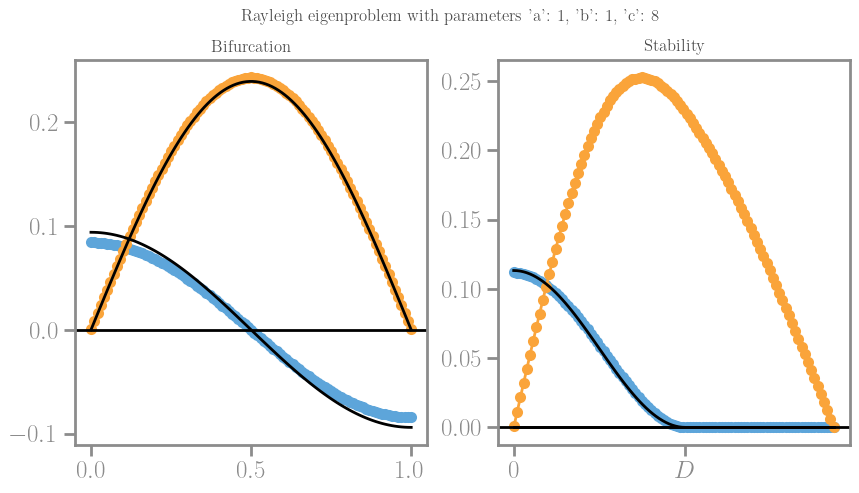

In [47]:
_fig, _axes = pp.plot_fields_for_time_step(mode)
_fig.suptitle(f"Rayleigh eigenproblem with parameters {parameters}")

coeff_v = l2_norm([
    (mode['mesh'], mode['fields']['bifurcation_v']),
    (mode['mesh'], mode['fields']['bifurcation_β'])
    ])

coeff_k = l2_norm([
    (mode['mesh'], mode['fields']['stability_v']),
    (mode['mesh'], mode['fields']['stability_β'])
    ])

eigenspace_v, _normalisation_v = eig.solve_eigenspace_vector(parameters, idx=1)
eigenspace_k, _normalisation_k = eig.solve_eigenspace_cone(parameters)

v, β = eigenspace_v["v"], eigenspace_v["β"]

x_values = np.linspace(0, 1, 100)
v_function = sp.lambdify('x', v)
β_function = sp.lambdify('x', β)

v_values = [v_function(x) for x in x_values]
β_values = [β_function(x) for x in x_values]

_axes[0].plot(x_values, np.array(β_values)*coeff_v, label=r'$\beta(x)$', c='k')
_axes[0].plot(x_values, np.array(v_values)*coeff_v, label=r'$v(x)$', c='k')

v, β = eigenspace_k["v"], eigenspace_k["β"]
D = eigenspace_k["D"]
x_values = np.linspace(0, 1, 100)
v_function = sp.lambdify('x', v)
β_function = sp.lambdify('x', β)
v_values = [v_function(x) for x in x_values]
β_values = [β_function(x) for x in x_values]

_axes[1].plot(x_values, np.array(β_values)*coeff_k, label=r'$\beta(x)$', c='k')
_axes[1].plot(x_values, np.array(v_values)*coeff_k, label=r'$v(x)$', c='k')
_axes[1].set_xticks([0, float(sp.N(D))], [0, "$D$"])



In [56]:
l2_norm([
    (x_values, np.array(v_values)),
    (x_values, np.array(β_values))
    ])

1.0

/var/folders/ht/z8sb7wsd1bg0qpmyyfyq2rcm0000gr/T/ipykernel_50626/1247390959.py:17: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(a, bc_squared, result, levels=[1], colors='white', linestyles='dashed', label=r'$\mathsf{R}^*= 1$')


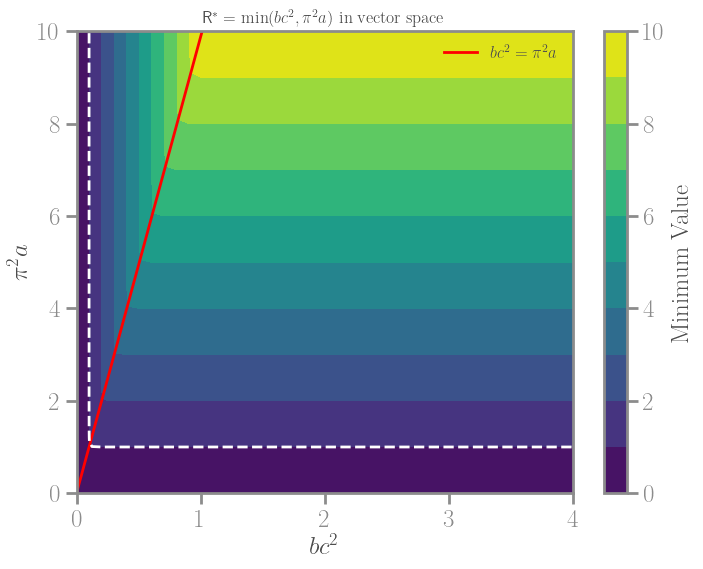

In [94]:

# Define the parameter ranges
bc_squared_values = np.linspace(0, 10, 100)
a_values = np.linspace(0, 10, 100)

# Create a meshgrid for the parameters
bc_squared, a = np.meshgrid(bc_squared_values, a_values)
# a, bc_squared = np.meshgrid(a_values, bc_squared_values)

# Compute the function value for each combination of parameters
result = np.minimum(bc_squared, np.pi**2 * a)

# Create a contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(a, bc_squared, result, cmap='viridis', levels=10)
plt.colorbar(contour, label='Minimum Value')
plt.plot(a_values, np.pi**2 * a_values, color='red', label=r'$bc^2 = \pi^2 a$')
plt.contour(a, bc_squared, result, levels=[1], colors='white', linestyles='dashed', label=r'$\mathsf{R}^*= 1$')

plt.ylim([0, 10])
plt.xlim([0, 4])

plt.xlabel(r'$bc^2$')
plt.ylabel(r'$\pi^2 a$')

plt.title(r'$\mathsf{R}^*= \min(bc^2, \pi^2 a)$ in vector space')

plt.legend()
# Show the plot
plt.show()

In [95]:
bc_squared

array([[ 0.       ,  0.1010101,  0.2020202, ...,  9.7979798,  9.8989899,
        10.       ],
       [ 0.       ,  0.1010101,  0.2020202, ...,  9.7979798,  9.8989899,
        10.       ],
       [ 0.       ,  0.1010101,  0.2020202, ...,  9.7979798,  9.8989899,
        10.       ],
       ...,
       [ 0.       ,  0.1010101,  0.2020202, ...,  9.7979798,  9.8989899,
        10.       ],
       [ 0.       ,  0.1010101,  0.2020202, ...,  9.7979798,  9.8989899,
        10.       ],
       [ 0.       ,  0.1010101,  0.2020202, ...,  9.7979798,  9.8989899,
        10.       ]])

In [ ]:

# Define the parameter ranges
bc_squared_values = np.linspace(0, 10, 100)
a_values = np.linspace(0, 10, 100)

# Create a meshgrid for the parameters
bc_squared, a = np.meshgrid(bc_squared_values, a_values)
# a, bc_squared = np.meshgrid(a_values, bc_squared_values)

# Compute the function value for each combination of parameters
result = np.minimum(bc_squared, np.pi**2 * a)

# Create a contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(a, bc_squared, result, cmap='viridis', levels=10)
plt.colorbar(contour, label='Minimum Value')
plt.plot(a_values, np.pi**2 * a_values, color='red', label=r'$bc^2 = \pi^2 a$')
plt.contour(a, bc_squared, result, levels=[1], colors='white', linestyles='dashed', label=r'$\mathsf{R}^*= 1$')

plt.ylim([0, 10])
plt.xlim([0, 4])

plt.xlabel(r'$bc^2$')
plt.ylabel(r'$\pi^2 a$')

plt.title(r'$\mathsf{R}^*= \min(bc^2, \pi^2 a)$ in vector space')

plt.legend()
# Show the plot
plt.show()

## Phase space computations


In [10]:
import os
cwd = os.getcwd()
path_components = cwd.split(os.path.sep)
path_components = path_components[0:-2]
dirroot =  '/' + os.path.join(*path_components, 'test', 'output', 'rayleigh-benchmark', 'MPI-1')

!ls $dirroot


1886c43ceb7f7b33293e7718baadb80f 77a89ece3426e790a56e6940e78cf1a7
26bbaa4b0607bbe85afb0a9daf9e6b4d 8fe224a5e96c0d9085c9cba0471be443
2b8cc196b9e91bd99b8bd6d1cd601a41 a34f942db5e46624e9ea3eefa3e0e85c
35dc528686badfde6e535184026e2c38 ac534c4c1dbbe6a1207c15d186d48888
3f6ee8d6ea68cadc4693189cd016895a c0dbb31f479bf79ff9eca6507f6df6d5
5799bad12159810af586ca258331254f db96dbfd262ff2e5a5980c74dc9ca846
62a2522ac6885818c04a6a78eae11bfa dbf4f01eb6ee4d83dfc6aa2f5783c662
64fcd459f19718fd498c98901bedd243 e9276db499c49b725dbe8cb8ac8c9521
70df91fae5b5c6004f37eabb3a8916a5


/var/folders/ht/z8sb7wsd1bg0qpmyyfyq2rcm0000gr/T/ipykernel_71911/1728680788.py:16: RuntimeWarning: divide by zero encountered in divide
  D_values = (np.pi**2 * a / bcsq)**(1/3)
/var/folders/ht/z8sb7wsd1bg0qpmyyfyq2rcm0000gr/T/ipykernel_71911/1728680788.py:16: RuntimeWarning: invalid value encountered in divide
  D_values = (np.pi**2 * a / bcsq)**(1/3)


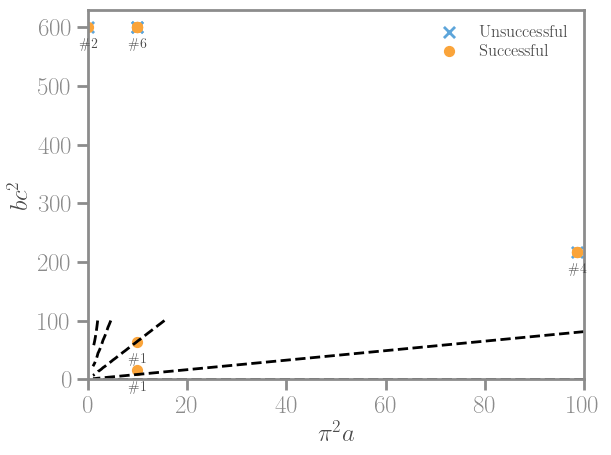

In [39]:
import os
import yaml
import matplotlib.pyplot as plt

def load_parameters(directory):
    parameters_file = os.path.join(directory, 'parameters.yaml')
    if os.path.exists(parameters_file):
        with open(parameters_file, 'r') as f:
            parameters = yaml.safe_load(f)
        return parameters
    else:
        return None
    
def compute_contour(a_values, bc_square_values):
    a, bcsq = np.meshgrid(a_values, bc_square_values)
    D_values = (np.pi**2 * a / bcsq)**(1/3)
    return a, bcsq, D_values

def plot_phase_space(rootdir):
    successful_points = []
    unsuccessful_points = []
    points_count = {}

    for subdir, _, _ in os.walk(rootdir):
        parameters = load_parameters(subdir)
        if parameters is not None:
            a = parameters.get('model', {}).get('a')
            b = parameters.get('model', {}).get('b')
            c = parameters.get('model', {}).get('c')

            # Check if the computation is successful based on the existence of mode_shapes_data.npz
            success_file = os.path.join(subdir, 'mode_shapes_data.npz')
            datapoint = (np.pi**2 * a, b*c**2)
            
            if os.path.exists(success_file):
                successful_points.append(datapoint)
            else:
                unsuccessful_points.append(datapoint)

            points_count[datapoint] = points_count.get(datapoint, 0) + 1

    for datapoint, count in points_count.items():
        # plt.scatter(*datapoint, label=f'Multiplicity: {count}', marker='')
        # plt.scatter(*datapoint, marker='')
        plt.annotate(f'\#{count}', datapoint, textcoords="offset points", xytext=(0, -15), ha='center')

    # Create the plot
    plt.scatter(*zip(*unsuccessful_points), label='Unsuccessful', marker='x')
    plt.scatter(*zip(*successful_points), label='Successful', marker='.', s=200)
    plt.xlabel('$\pi^2 a$')
    plt.ylabel('$bc^2$')
    plt.legend()
    a_values = np.linspace(0, 100, 100)
    bc_sq_values = np.linspace(0, 100, 100)
    a, bc_sq, D_values = compute_contour(a_values, bc_sq_values)
    plt.contour(bc_sq, a , D_values, levels=5, colors='black', linestyles='dashed')

    plt.show()

# Example usage
plot_phase_space(dirroot)


In [20]:
successful_points = []
unsuccessful_points = []

for subdir, _, _ in os.walk(dirroot):
    parameters = load_parameters(subdir)
    if parameters is not None:
        a = parameters.get('model', {}).get('a')
        b = parameters.get('model', {}).get('b')
        c = parameters.get('model', {}).get('c')
        # Check if the computation is successful based on the existence of mode_shapes_data.npz
        success_file = os.path.join(subdir, 'mode_shapes_data.npz')
        if os.path.exists(success_file):
            successful_points.append((a, b*c**2))
        else:
            unsuccessful_points.append((a, b*c**2))


In [16]:
dirroot

'/Users/kumiori3/Documents/WIP/Nature/mec647/test/output/rayleigh-benchmark/MPI-1'

In [17]:
num_points = 100
points = [eig.book_of_the_numbers() for _ in range(num_points)]


NameError: name 'eig' is not defined